In [17]:
import pandas as pd
import seaborn as sns
import csv 
import numpy as np

In [18]:
df1 = pd.read_csv('price_demand_data.csv')
df2 = pd.read_csv('weather_data.csv')

In [19]:
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [20]:
newdf1 = df1.groupby('Date').max('TOTALDEMAND')
newdf1

,TOTALDEMAND
Date,
1/01/2021,5019.64
1/02/2021,5228.29
1/03/2021,5225.37
1/04/2021,5807.02
1/05/2021,5261.09
...,...
9/04/2021,5688.63
9/05/2021,5222.89
9/06/2021,7224.91


In [21]:
data = df1.merge(df2, left_on='Date', right_on='Date')
data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [22]:
data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY', 'Date',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [7]:
data.shape

(11663, 25)

In [8]:
data.describe()

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,11663.000000,11615.000000,11615.000000,11567.000000,11663.000000,11663.000000,11519.000000,11615.000000,11615.000000,11663.000000,11567.000000,11663.000000,11663.000000,11615.000000,11615.000000
mean,4925.808274,11.050435,19.444968,1.576900,3.902564,5.349044,34.412796,13.720189,74.454326,5.164537,1017.740572,18.039467,56.931236,5.301679,1015.824839
std,876.444423,3.862339,5.342591,4.489775,2.696787,3.597600,10.887466,4.297780,14.149469,2.557707,7.668102,4.952872,13.989108,2.387307,7.421117
min,2708.530000,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,4255.490000,8.100000,15.500000,0.000000,1.800000,2.100000,28.000000,10.900000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,4803.730000,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.800000
75%,5477.375000,13.800000,21.800000,0.600000,5.600000,8.400000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.200000,66.000000,7.000000,1021.600000
max,8196.830000,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [ ]:
#visulaization

In [23]:
data.isnull().sum()

REGION                                 0
SETTLEMENTDATE                         0
TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)              48
Maximum temperature (°C)              48
Rainfall (mm)                         96
Evaporation (mm)                       0
Sunshine (hours)                       0
Direction of maximum wind gust       144
Speed of maximum wind gust (km/h)    144
Time of maximum wind gust            144
9am Temperature (°C)                  48
9am relative humidity (%)             48
9am cloud amount (oktas)               0
9am wind direction                    48
9am wind speed (km/h)                 48
9am MSL pressure (hPa)                96
3pm Temperature (°C)                   0
3pm relative humidity (%)              0
3pm cloud amount (oktas)              48
3pm wind direction                     0
3pm wind speed (km/h)                  0
3pm MSL pressure

In [24]:
data.mean()

TOTALDEMAND                          4925.808274
Minimum temperature (°C)               11.050435
Maximum temperature (°C)               19.444968
Rainfall (mm)                           1.576900
Evaporation (mm)                        3.902564
Sunshine (hours)                        5.349044
Speed of maximum wind gust (km/h)      34.412796
9am Temperature (°C)                   13.720189
9am relative humidity (%)              74.454326
9am cloud amount (oktas)                5.164537
9am MSL pressure (hPa)               1017.740572
3pm Temperature (°C)                   18.039467
3pm relative humidity (%)              56.931236
3pm cloud amount (oktas)                5.301679
3pm MSL pressure (hPa)               1015.824839
dtype: float64

In [25]:
#Fill the null values with mean values
new_data = data.fillna(data.mean())
new_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.800000,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,1017.740572,19.4,43,6.0,N,30,1012.2


In [11]:
new_data.isnull().sum()

REGION                                 0
SETTLEMENTDATE                         0
TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               0
Rainfall (mm)                          0
Evaporation (mm)                       0
Sunshine (hours)                       0
Direction of maximum wind gust       144
Speed of maximum wind gust (km/h)      0
Time of maximum wind gust            144
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)               0
9am wind direction                    48
9am wind speed (km/h)                 48
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   0
3pm relative humidity (%)              0
3pm cloud amount (oktas)               0
3pm wind direction                     0
3pm wind speed (km/h)                  0
3pm MSL pressure

In [15]:
#final_data = new_data.groupby('Date').max('SETTLEMENTDATE')
#final_data = new_data.groupby('Date').max('Maximum temperature (°C)')
#final_data = new_data.groupby('Date').max('TOTALDEMAND')

In [26]:
final_data = new_data.groupby(['Date']).max()


In [66]:
final_data = new_data.groupby('Date').max({'TOTALDEMAND':['max']})

In [27]:
final_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0000,2.8,9.3,NNE,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0000,7.4,1.6,S,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0000,6.4,6.3,S,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0000,4.4,10.8,NNW,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0000,5.4,7.1,N,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2000,6.4,7.9,S,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4000,0.0,7.1,NW,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0000,1.6,0.5,S,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8


In [26]:
final_data["MEANTEMPERATURE"] = (final_data['Minimum temperature (°C)'] + final_data['Maximum temperature (°C)'])/2
final_data['Relative Humidity'] = final_data['3pm relative humidity (%)']/100

In [28]:
final_data.corr(method='pearson')

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
TOTALDEMAND,1.000000,-0.488245,-0.290005,-0.072715,-0.264008,-0.139581,0.081024,-0.390844,0.103267,-0.167373,0.051993,-0.325252,0.064301,0.070940,-0.005067
Minimum temperature (°C),-0.488245,1.000000,0.707525,0.043400,0.655132,0.081808,0.055599,0.915726,-0.333647,0.206492,-0.326020,0.661643,-0.055004,0.062040,-0.278156
Maximum temperature (°C),-0.290005,0.707525,1.000000,-0.124821,0.620700,0.469055,-0.056155,0.820029,-0.309292,-0.170133,-0.101655,0.965135,-0.456640,-0.238615,-0.178446
Rainfall (mm),-0.072715,0.043400,-0.124821,1.000000,-0.044562,-0.146529,0.042003,-0.020988,0.194397,0.069613,-0.138618,-0.126890,0.194560,0.111460,-0.056881
Evaporation (mm),-0.264008,0.655132,0.620700,-0.044562,1.000000,0.273256,0.158109,0.705836,-0.528364,0.014322,-0.272173,0.560214,-0.208511,-0.095795,-0.254226
Sunshine (hours),-0.139581,0.081808,0.469055,-0.146529,0.273256,1.000000,-0.058401,0.197050,-0.237637,-0.596661,0.206708,0.487546,-0.550315,-0.722233,0.132140
Speed of maximum wind gust (km/h),0.081024,0.055599,-0.056155,0.042003,0.158109,-0.058401,1.000000,0.108981,-0.392071,0.025506,-0.414805,-0.097804,-0.083759,0.135831,-0.426558
9am Temperature (°C),-0.390844,0.915726,0.820029,-0.020988,0.705836,0.197050,0.108981,1.000000,-0.467492,0.071326,-0.285478,0.761580,-0.157132,-0.003271,-0.277634
9am relative humidity (%),0.103267,-0.333647,-0.309292,0.194397,-0.528364,-0.237637,-0.392071,-0.467492,1.000000,0.063188,0.142822,-0.261353,0.402235,0.031220,0.138699
9am cloud amount (oktas),-0.167373,0.206492,-0.170133,0.069613,0.014322,-0.596661,0.025506,0.071326,0.063188,1.000000,-0.198457,-0.181595,0.424203,0.392260,-0.121681


In [ ]:
#visualization

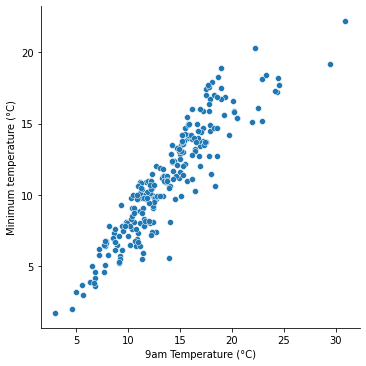

In [16]:
sns.relplot(x='9am Temperature (°C)', y='Minimum temperature (°C)', data=final_data)

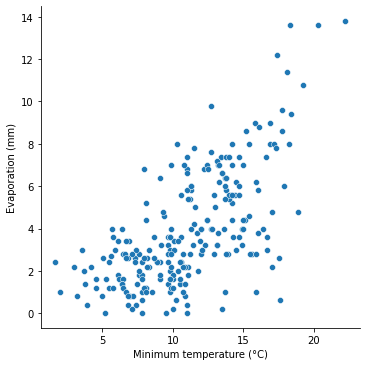

In [43]:
sns.relplot(x='Minimum temperature (°C)', y='Evaporation (mm)', data=final_data)


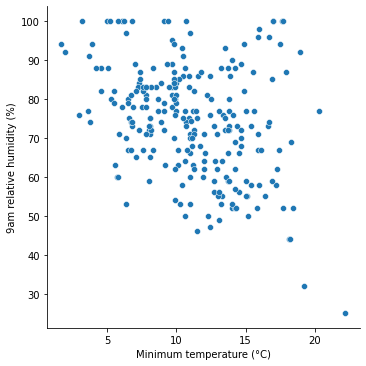

In [45]:
sns.relplot(x='Minimum temperature (°C)', y='9am relative humidity (%)', data=final_data)


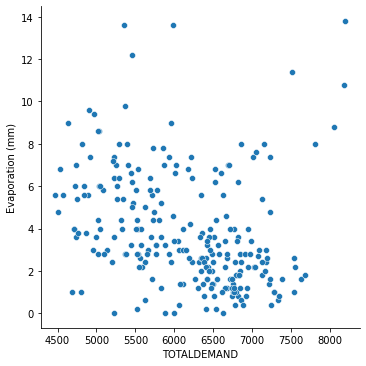

In [53]:
sns.relplot(x='TOTALDEMAND', y='Evaporation (mm)', data=final_data)

In [ ]:
 #model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [30]:
final_data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [34]:

#final_data['Relative Humidity'] = final_data['3pm relative humidity (%)']/100


In [31]:
final_data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [32]:
train = final_data.drop(['REGION','SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)', 'Rainfall (mm)',
       'Time of maximum wind gust', '9am Temperature (°C)', 'Evaporation (mm)',
      '9am cloud amount (oktas)', '3pm relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'], axis=1)

test = final_data['TOTALDEMAND']



In [33]:
train.columns

Index(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       '9am relative humidity (%)'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=3)
regr = LinearRegression()

In [37]:
regr.fit(X_train, y_train)

LinearRegression()

In [128]:
#X_pred = regr.predict(X_test)

In [38]:
y_pred = regr.predict(X_test)

In [39]:
#to output of the coefficient
regr.coef_

array([-126.13078553,   16.88389337,   -4.08140117])

In [40]:
y_pred

array([6905.33726775, 6456.1424944 , 6357.80038695, 6092.37382986,
       6341.43808365, 6176.30483422, 6772.20750852, 6310.55534227,
       6190.28110732, 6408.41893948, 6674.1442452 , 6050.3737148 ,
       5645.93737236, 5881.82371726, 6212.95796653, 6586.03853794,
       6067.15078316, 6767.60064604, 6913.8261655 , 6045.66776978,
       6352.31285118, 6446.17839669, 6044.95957625, 6020.71080476,
       6553.11205547, 5732.08549819, 5267.72417694, 6314.13148684,
       6657.70246367, 5726.87710677, 6255.07098762, 6666.75262072,
       5830.63662358, 6144.5675655 , 6674.97232639, 5571.88741644,
       5997.36526083, 6167.52714008, 5914.19207148, 5551.70355222,
       6522.53801498, 6474.23269584, 6442.99103167, 5767.79377204,
       6614.54179077, 5543.3247503 , 6746.53239772, 7060.59645037,
       6147.56581709])

In [41]:
y_test

Date
10/07/2021    6825.14
24/07/2021    6492.94
23/07/2021    7329.83
1/07/2021     6752.13
16/06/2021    7031.11
24/06/2021    6787.77
23/06/2021    7077.89
3/08/2021     7197.61
14/04/2021    5731.88
25/08/2021    6736.80
22/07/2021    7536.62
19/04/2021    5937.22
14/01/2021    5257.95
3/04/2021     5723.27
31/08/2021    5779.56
21/05/2021    6736.74
1/04/2021     5807.02
27/08/2021    6769.89
5/06/2021     6484.85
11/08/2021    6687.69
30/04/2021    5887.34
12/08/2021    6537.70
8/01/2021     5365.19
17/04/2021    5450.82
6/07/2021     7281.69
3/03/2021     5526.41
24/03/2021    5549.13
10/08/2021    6234.67
24/05/2021    6354.64
16/02/2021    6816.18
13/07/2021    7174.57
26/08/2021    7126.76
18/03/2021    5691.57
7/05/2021     5957.64
24/08/2021    6717.65
17/02/2021    7230.71
4/02/2021     6015.71
14/06/2021    6366.51
27/04/2021    6487.76
18/02/2021    7508.61
5/05/2021     6389.08
28/04/2021    6461.27
19/08/2021    6344.80
19/03/2021    5467.08
8/08/2021     6477.76
5/04/

In [42]:
#to check the efficiency of model
regr.score(X_test, y_test)

0.16249877361359477

In [43]:
train.corr()

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%)
Minimum temperature (°C),1.000000,0.707525,-0.333647
Maximum temperature (°C),0.707525,1.000000,-0.309292
9am relative humidity (%),-0.333647,-0.309292,1.000000


In [45]:
#to check efficiency of model

from sklearn.metrics import mean_absolute_error


In [46]:
print(mean_absolute_error(y_test, y_pred))

427.4982848056156


In [48]:
#to check the efficiency of model using r square

import statsmodels.api as sm


In [49]:
Y = final_data['TOTALDEMAND']
X_addC = sm.add_constant(train)
result = sm.OLS(Y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.24755922276903775 0.23811435945651516


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTALDEMAND   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     26.21
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.08e-14
Time:                        00:13:47   Log-Likelihood:                -1939.0
No. Observations:                 243   AIC:                             3886.
Df Residuals:                     239   BIC:                             3900.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      7441.1648    360.139     20.662      0.000    6731.712    8150.618
Minimum temperature (°C)   -122.6196     17.028     -7.201      0.000    -156.164     -89.075
Maximum temperature (°C)     15.6430     12.202      1.282      0.201      -8.394      39.680
9am relative humidity (%)    -3.3841      3.454     -0.980      0.328     -10.189       3.421
==============================================================================
Omnibus:                       30.895   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.713
Skew:                           0.743   Prob(JB):                     2.64e-11
Kurtosis:                       4.613   Cond. No.                         621.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Classification
final_data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PRICECATEGORY',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [52]:
mapper = {'LOW': 0, 'MEDIUM' :1, 'HIGH': 2}
final_data['PRICECATEGORY'] = final_data['PRICECATEGORY'].map(mapper)

In [64]:
X = final_data.drop(['REGION', 'SETTLEMENTDATE', 'PRICECATEGORY',
       'TOTALDEMAND', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'], axis=1)
y = final_data['PRICECATEGORY']

In [65]:
X.columns

Index(['Minimum temperature (°C)'], dtype='object')

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:


# initialise the tree
dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state=42, # the random state to run this at
                            max_depth=3 # the depth of the tree
)

# fit it to the training dataset
dt.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [69]:
# assign y_pred to the predictions of the DT given the X_test
y_predict = dt.predict(X_test1)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [70]:
y_test1.values

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1])

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, y_predict)

0.8163265306122449

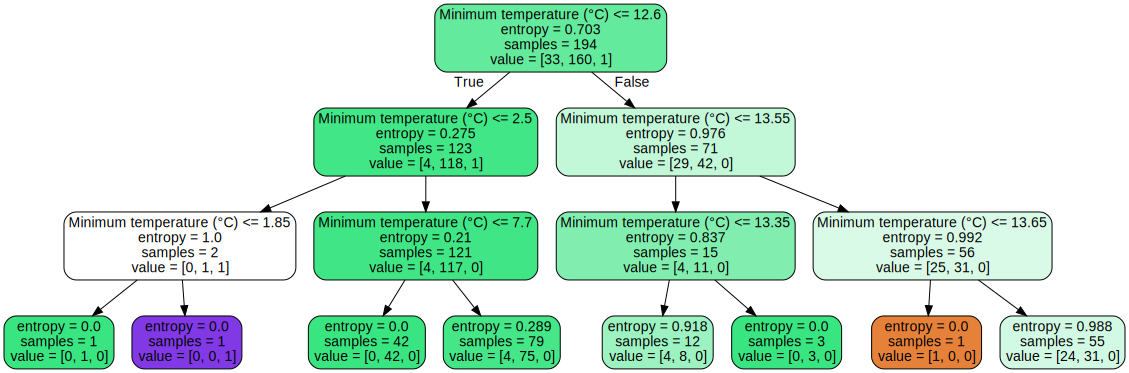

In [72]:
#Visualization of DT
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, # the model we trained
                out_file="mytree.dot", # name of the output file - has to be a .dot file
                feature_names=X.columns, # the names of our features
                filled=True, # formatting: do we want to fill the features with colour
                rounded=True # formatting: do we want rounded edges
               )

# then, open the file using Python
with open("./mytree.dot") as f:
    dot_graph = f.read()

# visualize using graphviz, you won't be able to "open" it using normal methods
graphviz.Source(dot_graph)